In [21]:
import os
import zipfile

local_zip = '/tmp/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

local_zip = '/tmp/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

In [22]:
rock_dir = os.path.join('/tmp/rps/rock')
paper_dir = os.path.join('/tmp/rps/paper')
scissors_dir = os.path.join('/tmp/rps/scissors')

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

'''
rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])
'''

total training rock images: 840
total training paper images: 840
total training scissors images: 840


'\nrock_files = os.listdir(rock_dir)\nprint(rock_files[:10])\n\npaper_files = os.listdir(paper_dir)\nprint(paper_files[:10])\n\nscissors_files = os.listdir(scissors_dir)\nprint(scissors_files[:10])\n'

In [ ]:
'''
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_rock = [os.path.join(rock_dir, fname) 
                for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname) 
                for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname) 
                for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  #print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()
'''

"\n%matplotlib inline\n\nimport matplotlib.pyplot as plt\nimport matplotlib.image as mpimg\n\npic_index = 2\n\nnext_rock = [os.path.join(rock_dir, fname) \n                for fname in rock_files[pic_index-2:pic_index]]\nnext_paper = [os.path.join(paper_dir, fname) \n                for fname in paper_files[pic_index-2:pic_index]]\nnext_scissors = [os.path.join(scissors_dir, fname) \n                for fname in scissors_files[pic_index-2:pic_index]]\n\nfor i, img_path in enumerate(next_rock+next_paper+next_scissors):\n  #print(img_path)\n  img = mpimg.imread(img_path)\n  plt.imshow(img)\n  plt.axis('Off')\n  plt.show()\n"

In [23]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "/tmp/rps/"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "/tmp/rps-test-set/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)


Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [24]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [25]:
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(train_generator, epochs=25, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=3)

#model.save("rps.h5")

Epoch 1/25
20/20 [==============================] - 19s 964ms/step - loss: 1.2805 - accuracy: 0.3615 - val_loss: 1.0664 - val_accuracy: 0.3333
Epoch 2/25
20/20 [==============================] - 19s 958ms/step - loss: 1.2007 - accuracy: 0.4194 - val_loss: 1.0445 - val_accuracy: 0.6102
Epoch 3/25
20/20 [==============================] - 19s 954ms/step - loss: 1.1349 - accuracy: 0.4349 - val_loss: 0.9308 - val_accuracy: 0.6344
Epoch 4/25
20/20 [==============================] - 19s 932ms/step - loss: 1.0360 - accuracy: 0.5107 - val_loss: 0.6961 - val_accuracy: 0.7876
Epoch 5/25
20/20 [==============================] - 19s 932ms/step - loss: 0.8448 - accuracy: 0.5956 - val_loss: 0.4269 - val_accuracy: 0.7231
Epoch 6/25
20/20 [==============================] - 19s 934ms/step - loss: 0.7121 - accuracy: 0.6825 - val_loss: 0.1435 - val_accuracy: 0.9812
Epoch 7/25
20/20 [==============================] - 19s 932ms/step - loss: 0.6562 - accuracy: 0.7246 - val_loss: 0.2856 - val_accuracy: 0.8414

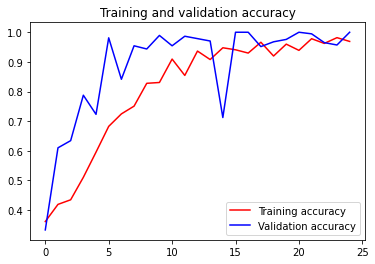

<Figure size 432x288 with 0 Axes>

In [26]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [34]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

  #[1 0 0] = paper
  #[0 1 0] = rock
  #[0 0 1] = scissor

Saving paper1.png to paper1 (1).png
Saving rock3.png to rock3 (1).png
Saving scissors9.png to scissors9.png
paper1.png
[[1. 0. 0.]]
rock3.png
[[0. 1. 0.]]
scissors9.png
[[0. 0. 1.]]
